<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 2 Assignment 1*

Analyze a corpus of text using text visualization of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Stemming
- Lemmatization
- Custom stopword removal
- Using frequency based stopwrod removal

You are free to use any dataset you are interested in. Kaggle is a great place to start. Feel free to sample the data if the dataset is too large to hanlde in memory. 

In [6]:
pip install spacy

    100% |████████████████████████████████| 33.3MB 784kB/s 
    100% |████████████████████████████████| 3.0MB 3.0MB/s 
    100% |████████████████████████████████| 276kB 3.5MB/s 
    100% |████████████████████████████████| 61kB 7.3MB/s 
    100% |████████████████████████████████| 153kB 3.9MB/s 
    100% |████████████████████████████████| 2.8MB 3.2MB/s 
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [14]:
# Start here 
"""
Import Statements
"""

# Base
from collections import Counter
import re

import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

import en_core_web_sm
nlp = en_core_web_sm.load()

In [15]:
df = pd.read_csv("./data/songdata.csv")
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [16]:
def tokenize(text):
    sample = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = sample.lower().split()
    
    return tokens

In [17]:
df['tokens'] = df['text'].apply(tokenize)
df['tokens'].head()

0    [look, at, her, face, its, a, wonderful, face,...
1    [take, it, easy, with, me, please, touch, me, ...
2    [ill, never, know, why, i, had, to, go, why, i...
3    [making, somebody, happy, is, a, question, of,...
4    [making, somebody, happy, is, a, question, of,...
Name: tokens, dtype: object

In [18]:
from collections import Counter

word_counts = Counter()

df['tokens'].apply(lambda x: word_counts.update(x))

word_counts.most_common(10)

[('the', 497232),
 ('i', 426512),
 ('you', 425001),
 ('to', 296483),
 ('and', 294134),
 ('a', 255303),
 ('me', 201835),
 ('my', 170528),
 ('in', 167441),
 ('it', 149028)]

In [19]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [22]:
wc = count(df['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
45,the,54557,497232,1.0,0.039366,0.039366,0.946349
24,i,48036,426512,2.0,0.033767,0.073133,0.833235
115,you,48177,425001,3.0,0.033647,0.106781,0.835681
14,to,52237,296483,4.0,0.023473,0.130253,0.906106
10,and,51922,294134,5.0,0.023287,0.153540,0.900642


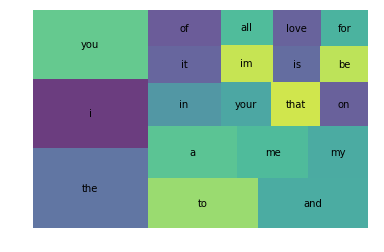

In [24]:
wc_top20 = wc[wc['rank'] <= 20]
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

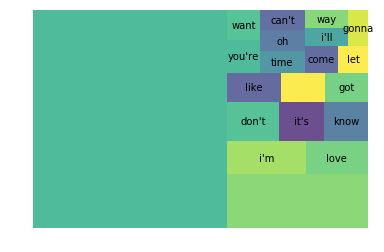

In [28]:
# omitting stop words
import spacy
from spacy.tokenizer import Tokenizer

import en_core_web_sm
nlp = en_core_web_sm.load()

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)
tokens = []

""" Update those tokens """
for doc in tokenizer.pipe(df['text'], batch_size=500):
    doc_tokens = []
    for token in doc:
        if (token.is_stop == False) and (token.is_punct == False):
            doc_tokens.append(token.text.lower())
    tokens.append(doc_tokens)        
    
df['tokens'] = tokens
wc = count(df['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [29]:
wc_top20

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
8,\n,57450,1652517,1.0,0.203055,0.203055,0.996531
27,\n \n,48139,295148,2.0,0.036267,0.239322,0.835022
5,i'm,27522,104175,3.0,0.012801,0.252122,0.477398
136,love,22933,81532,4.0,0.010018,0.262141,0.397797
81,don't,25057,79394,5.0,0.009756,0.271896,0.434640
17,it's,24401,67708,6.0,0.008320,0.280216,0.423261
51,know,25516,66386,7.0,0.008157,0.288373,0.442602
43,like,23344,62527,8.0,0.007683,0.296056,0.404926
10,\n\n,51062,51062,9.0,0.006274,0.302331,0.885724
539,got,17769,49445,10.0,0.006076,0.308406,0.308222


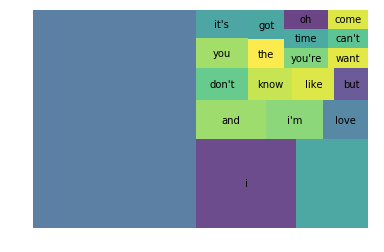

In [33]:
# adding custom stop words
STOP_WORDS = nlp.Defaults.stop_words.union(['\n', '\n \n', '\n\n','\n	', '\n \n', '\n'])

tokens = []

for doc in tokenizer.pipe(df['text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
df['tokens'] = tokens
wc = count(df['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [34]:
wc_top20

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
9,\n,57450,1652517,1.0,0.173819,0.173819,0.996531
21,i,47724,415921,2.0,0.043748,0.217568,0.827823
29,\n \n,48139,295148,3.0,0.031045,0.248613,0.835022
7,and,38260,128458,4.0,0.013512,0.262125,0.663660
5,i'm,27522,104175,5.0,0.010958,0.273082,0.477398
148,love,22933,81532,6.0,0.008576,0.281658,0.397797
88,don't,25057,79394,7.0,0.008351,0.290009,0.434640
198,you,24301,72207,8.0,0.007595,0.297604,0.421526
17,it's,24401,67708,9.0,0.007122,0.304726,0.423261
56,know,25516,66386,10.0,0.006983,0.311709,0.442602


## Stretch Goals

* Write a web scraper that can scrape "Data Scientist" job listings from indeed.com.
* Look ahead to some of the topics from later this week:
 - Part of Speech Tagging
 - Named Entity Recognition
 - Document Classification
* Try a different visualization techniques
* Automate the process of retriving job listings. ;)